In [3]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image

In [4]:
df_poke = pd.read_csv("data/pokemon.csv")

df_poke

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [5]:
pokemon_type_list = df_poke["Type1"].unique()

type_to_pokemon_list = {}

for pokemon_type in pokemon_type_list :
    type_to_pokemon_list[pokemon_type] = []

for _, row in df_poke.iterrows():
    pokemon_name = row[0]
    pokemon_type1 = row[1]
    
    type_to_pokemon_list[pokemon_type1].append(pokemon_name)


del type_to_pokemon_list["Flying"]

type_to_pokemon_list

{'Grass': ['bulbasaur',
  'ivysaur',
  'venusaur',
  'oddish',
  'gloom',
  'vileplume',
  'bellsprout',
  'weepinbell',
  'victreebel',
  'exeggcute',
  'exeggutor',
  'tangela',
  'chikorita',
  'bayleef',
  'meganium',
  'bellossom',
  'hoppip',
  'skiploom',
  'jumpluff',
  'sunkern',
  'sunflora',
  'treecko',
  'grovyle',
  'sceptile',
  'seedot',
  'nuzleaf',
  'shiftry',
  'shroomish',
  'breloom',
  'roselia',
  'cacnea',
  'cacturne',
  'tropius',
  'turtwig',
  'grotle',
  'torterra',
  'budew',
  'roserade',
  'cherubi',
  'cherrim',
  'carnivine',
  'snover',
  'abomasnow',
  'tangrowth',
  'leafeon',
  'shaymin-land',
  'snivy',
  'servine',
  'serperior',
  'pansage',
  'simisage',
  'cottonee',
  'whimsicott',
  'petilil',
  'lilligant',
  'maractus',
  'foongus',
  'amoonguss',
  'ferroseed',
  'ferrothorn',
  'virizion',
  'chespin',
  'quilladin',
  'chesnaught',
  'skiddo',
  'gogoat',
  'rowlet',
  'dartrix',
  'decidueye',
  'fomantis',
  'lurantis',
  'morelull',

In [123]:
def mean_std_transfer(img_arr_in=None, img_arr_ref=None):
    mean_in = np.mean(img_arr_in, axis=(0, 1), keepdims=True)
    mean_ref = np.mean(img_arr_ref, axis=(0, 1), keepdims=True)
    std_in = np.std(img_arr_in, axis=(0, 1), keepdims=True)
    std_ref = np.std(img_arr_ref, axis=(0, 1), keepdims=True)
    img_arr_out = (img_arr_in - mean_in) / std_in * std_ref + mean_ref
    img_arr_out[img_arr_out < 0] = 0
    img_arr_out[img_arr_out > 255] = 255
    return img_arr_out.astype(np.uint8)

In [124]:
def lab_transfer(img_arr_in=None, img_arr_ref=None):
        
        lab_in = cv2.cvtColor(img_arr_in, cv2.COLOR_RGB2LAB)
        lab_ref = cv2.cvtColor(img_arr_ref, cv2.COLOR_RGB2LAB)
        lab_out = mean_std_transfer(img_arr_in=lab_in, img_arr_ref=lab_ref)
        img_arr_out = cv2.cvtColor(lab_out, cv2.COLOR_LAB2RGB)
        return img_arr_out

In [125]:
IMAGE_DIR = "data/pokemon_png"

Bug


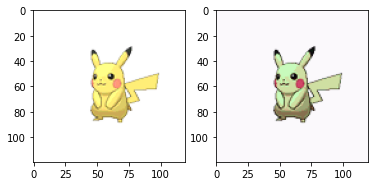

In [145]:
def create_average_image(type, type_to_pokemon_list, in_img):
    img_list = []
    pokemon_list = type_to_pokemon_list[type]
    count = 0
    for pokemon_name_ref in pokemon_list:
        
        ref_img = cv2.imread(IMAGE_DIR + "/" + pokemon_name_ref + ".png")
        ref_img = cv2.cvtColor(ref_img, cv2.COLOR_BGR2RGB)
        img_list.append(lab_transfer(in_img, ref_img))
    l = len(img_list)
    avg = img_list[0]
    for i in range(1, l):
        avg = Image.blend()
    return res


pokemon_name_in = "pikachu"

type = random.choice(list(type_to_pokemon_list.keys()))
print(type)

in_img = cv2.imread(IMAGE_DIR + "/" + pokemon_name_in + ".png")
in_img = cv2.cvtColor(in_img, cv2.COLOR_BGR2RGB)

average_img = create_average_image(type, type_to_pokemon_list, in_img)
fig, ax = plt.subplots(1,2)




ax[0].imshow(in_img)
ax[1].imshow(average_img)